# Variational Autoencoder

GDT on Machine Learning


## Introduction


### Autoencoders
Autoencoders are:
- neural networks
- task of **'representation learning'** or **'data coding'**
- used in unsupervised manner
In particular: *imposing a bottleneck in the network, we force the model to learn a **compressed** representation of the original input*.

The aim of autoencoders is:
- *encoding*:
    - learn a representation (encoding) for the data
    - perform dimensionality reduction
- *decoding*:
    - generate from encodings
    - gereative models (VAE)
- *encoding-deconding*:
    - denoising
    - coding and decoding
    
Application of autoencoders are:
- data compression
- data inpainting and denoising
- information retrieval

#### Intuition

We can take an *unlabeled* dataset and frame it as a supervised learning task with output $\hat{x}$, a **reconstruction of the original input** $x$.

![autoencoders_bottleneck.png](./figures/autoencoders_bottleneck.png)

We can train the network by minimizing the loss function (*reconstruction error*), $\mathcal{L}(\hat{x}, x)$. It measure the difference between the input and tho consequent reconstruction.

The *bottleneck* is the key:

- without a bottleneck, our model could easily learn how to copy/memorize the input values.
- with bottleneck, we constrain the amount of information that can traverse the full network
- we force the model to learn a comperession of the input.

#### Relationship with PCA
If linear activation are used (or only a single sigmoid-hidden-layer), then the optimal solution to an autoencoder is strongly related to PCA.

The weights of a AE with single hidden layer of size $h$, where $h <  D$ span the same vector subspace as the one spanned by the first $p$ principal components, and the output of the AE is an orthogonal projection onto this subspace.

The weight $\mathbf{W}_\text{AE}$ are not equal to the principal componets, and are in general not-orthogonal; but the principal components may be recovered from then using SVD.

#### Linear Autoencoders do PCA
##### recall of PCA (form [1])
Let be $\mathbf{Y} = \{\mathbf{y}_i\}_{i=0}^{N-1} \in \mathbb{R}^{D \times N}$ a set of $N$ observations, each of dimension $D$, with $D << N$.

Let be $\bar{\mathbf{y}} = \frac{1}{N} \sum_i \mathbf{y_i}$ the centroid and,

Let be $\mathbf{Y}_0 = \mathbf{Y} - \bar{\mathbf{y}}$ the centred observations.

Let be $\mathbf{W} \in \mathbb{R}^{L \times D}$ a linear transformation of a finite dimensional vector:
$$\mathbf{x}_i = \mathbf{W}^T \mathbf{y}_i$$
where $\mathbf{x}_i \in \mathbb{R}^{L}$, that is $\mathbf{X} = \mathbf{W}^T \mathbf{Y}$.

When $\mathbf{W}$ represent the transformation that applies PCA, denoted $\mathbf{W} = \mathbf{P}$, then the column of $\mathbf{P}$:
- $\{ \mathbf{p}_i \}_{i=0}^{D-1}$ are refered to as *loading vectors*
- the transformed vectors $\mathbf{x}_{i=0}^{N-1}$ are refered to as *principal components*.

The first loading vector is defined as the *unit vector which the inner product of the observations have the greatest variance*:
$$ \mathbf{p}_1 = \text{max}_{\mathbf{w}_1} \mathbf{w}_1 \mathbf{Y}_0 \mathbf{Y}_0^T \mathbf{w}_1 \; \; s.t. \mathbf{w}_1^T\mathbf{w}_1=1$$

In general all the vector of the matrix $\mathbf{P}$ can be computed by diagonalizing the covariance matrix:
$$\mathbf{Y}_0\mathbf{Y}_0^T = \mathbf{P}\mathbf{\Lambda}\mathbf{P}^{-1} = \mathbf{P}\mathbf{\Lambda}\mathbf{P}^{T}$$ 
Where $\mathbf{\Lambda} = \mathbf{X}_0\mathbf{X}_0^T$ is a diagonal matrix and the column of $\mathbf{P}$ are orthonormals, i.e. $\mathbf{P}^{-1} = \mathbf{P}^T$

PCA is often used for dimensionality reduction, this is done by simply keeping the $L$ principal components $L << D$, that is 
$$ \mathbf{X}_L = \mathbf{P}_L^T \mathbf{Y}$$
where each column of $\mathbf{X}_L \in \mathbb{R}^{D \times N}$ is a vector of the first $L$ principal components.

Interestingly, $\mathbf{P}_L$ is also the solution to:
$$ \text{min}_{\mathbf{W}\in \mathbb{R}^{D \times L}} \;\;|| \mathbf{Y}_0 - \mathbf{W}\mathbf{W}^T \mathbf{Y}_0 ||_\mathcal{F}^2 \;\; s.t. \mathbf{W}^T\mathbf{W} = \mathbf{I}_{L \times L}$$
where $\mathcal{F}$ is the Frobenius norm.

According to this formulation, the relsulting $L$ vectors are an orthonormal basis which spans the $L$ dimensional subspace onto which the projections of the centred observations have the mininum squared difference from the original centred observation. 

However the minimizer of such equation is not unique: $\mathbf{W} = \mathbf{P}_L \mathbf{Q}$ is also a solution for every $\mathbf{Q} \in \mathbb{R}^{L \times L}$ orthogonal.
We can find defrrent orthonormal basis for the same subspace.

##### Linear Autoencoders
In case of no  non-linear activation functions is used, the linear autoencoder applies the following two functions:
- the encoding $\mathbf{h}_i = \mathbf{W}_1 \mathbf{y}_i + \mathbf{b}_1$
- the decoding $\hat{\mathbf{y}_i} = \mathbf{W}_2 \mathbf{y}_i + \mathbf{b}_2$
The the loss fuction is:
$$ \text{min}_{\mathbf{\theta}} || \mathbf{Y} - ( \mathbf{W}_2 (\mathbf{W}_1 \mathbf{Y} + \mathbf{b}_1) + \mathbf{b}_2) ||_{\mathcal{F}}^2$$
where $\theta = \{ \mathbf{W}_1, \mathbf{W}_2, \mathbf{b}_1, \mathbf{b}_2\}$ are the network parameters.

Minimizing this, is equivalent to minizing the following [2]:
$$ \text{min}_{\mathbf{\theta}} || \mathbf{Y}_0 - \mathbf{W}_2 \mathbf{W}_1 \mathbf{Y}_0 ||_{\mathcal{F}}^2$$

When solving the gradieng we have the following:
$$ \mathbf{W}_1 = \mathbf{W}_2^t = (\mathbf{W}_2^T\mathbf{W}_2)^{-1}\mathbf{W}_2^T$$
Thus, we have to minimize w.r.t a single matrix:
$$ \text{min}_{\mathbf{\theta}} || \mathbf{Y}_0 - \mathbf{W}_2 \mathbf{W}_2^t \mathbf{Y}_0 ||_{\mathcal{F}}^2$$

The matrix $\mathbf{W}_2 \mathbf{W}_2^t = \mathbf{W}_2(\mathbf{W}_2^T\mathbf{W}_2)^{-1}\mathbf{W}_2^T$ is the orthogonal projection operator onto the column space of $\mathbf{W}_2$ when its columns are not necessarily orthonormal.
This problem is very similar to the one we defined before, but without orthonormality constraint.

The linear autoencoder is said to apply PCA to the input in the sense that its output is a projection of the data onto the low dimensional principal subspace.
However unlike the PCA, the coordinates of the output of the bottleneck are correlated and are not sorted in descending order of variance.

So it is not recoverding the loading vectorts $\mathbf{P}_L$, buth rather $\mathbf{P}_L\mathbf{Q}$ for some orthogonal matrix $\mathbf{Q}$.

## Reference
1. [From Principal Subspaces to Principal Components with Linear Autoencoders](https://arxiv.org/pdf/1804.10253.pdf)
2. [Auto-Association by Multilayer Perceptrons and Singular Value Decomposition](http://geza.kzoo.edu/~erdi/ML/bourlard-kamp88.pdf)

##### Example with the IRIS dataset
###### PCA first
Let's load the IRIS dataset and run PCA and plot the first 2 components against each other.

input dimension (150, 4)
label dimension (150,)


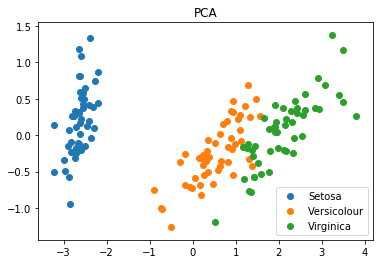

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

print('input dimension', X.shape)
print('label dimension', y.shape)

pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)


plt.scatter(X[y==0,0], X[y==0,1], label='Setosa')
plt.scatter(X[y==1,0], X[y==1,1], label='Versicolour')
plt.scatter(X[y==2,0], X[y==2,1], label='Virginica')
plt.title("PCA")
plt.legend()
plt.show()

##### Now with a AE
let's try with a very simple network with 3 layers (enconding, hidden and decoding) with linear activation

Training finished


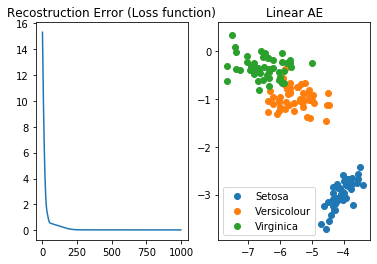

In [7]:
import torch
import torch.nn as nn
from torch.autograd import Variable
np.random.seed(5)

class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(4, 2))
        self.decoder = nn.Sequential(
            nn.Linear(2, 4))

    def forward(self, x, output_encoder=False):
        x = self.encoder(x)
        # linear activation function
        if output_encoder:
            return x
        x = self.decoder(x)
        # linear activation function
        return x

# definition
n_epochs = 1000
inputs = Variable(torch.Tensor(iris.data).float())

model = autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), 
                             lr=0.01)

# training
loss_tracker = np.zeros(n_epochs)
for epoch in range(n_epochs):
    # ===================forward=====================
    outputs = model(inputs)
    loss = criterion(outputs, inputs)
    # ===================backward====================
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_tracker[epoch] = loss.item()

print('Training finished')
outputs = model(inputs, output_encoder=True)
X = outputs.data.numpy()

fig, axarr = plt.subplots(1,2)
axarr[0].plot(loss_tracker)
axarr[0].set_title('Recostruction Error (Loss function)')

axarr[1].scatter(X[y==0,0], X[y==0,1], label='Setosa')
axarr[1].scatter(X[y==1,0], X[y==1,1], label='Versicolour')
axarr[1].scatter(X[y==2,0], X[y==2,1], label='Virginica')
axarr[1].legend()
axarr[1].set_title("Linear AE")
plt.show()

Essentially this structure approximates PCA by reducing the data from four features to two features in the hidden layer.

**take home message**: A single layer auto encoder with linear transfer function is nearly equivalent to PCA, where nearly means that the $W$ found by AE and PCA won't be the same. However the subspace spanned by the respective $W$'s will.
[proof here](https://arxiv.org/pdf/1804.10253.pdf)

#### Trade off in Autoencoders
the idea AE model should balances the followings:
- sensitive to the inputs enough to accurately build a reconstruction
- insensitive to the inputs enough that the model doesn't simply memorize or overfit

More than tweaking parameters (such as $H$), in most of the case this involves constructing a loss function with a regularizer:

$$J(\mathbf{x}, \hat{\mathbf{x}}) = \mathcal{L}(\mathbf{x}, \hat{\mathbf{x}}) + \beta P(\theta)$$
where $P$ is denote as regularizer and $\beta$ is the regularization term to adjust the trade-off between the two functions.

#### Variations
- **Undercomplete AutoEncoders**:
    - just a constrain on the number of nodes present in the hidden layer(s): no explicit regularization terms.
    - ideally, **this encoding will learn and describe latent attributes of the input data.**
    - why it works?
        - NN are capable of learning nonlinear relationships in the data. This can be tought as a powerful (nonlinear) gerenalization of PCA.
            - PCA attemps to discover a lower dimensional hyperplanes which decribes the original data
            - AE are capable of **learning nonlinear manifolds** (in very *simple* terms, a continuous, non instersecting surface)

![pca_vs_ae](./figures/pca_ae_manifold.png)

- **Sparse Autoencoders**:
    - here the reduction of number of nodes in the bottleneck is not required
    - we build the cost function such we penalize *activations* within the layer: for any inputs, we will encourange our network to learn an encoding and decoding map which only relies on activating a small number of neurons.
        - for UAE: the entire network is used for each input
        - for SAE: selected active regions of the network are used depending on the input, so that
            - limited network capacity to copy the data
            - no limited network capacity to extract features
    - regularization:
        - L1 regularization:
        $$\mathcal{L}(\mathbf{x}, \hat{\mathbf{x}} + \beta \sum_i | a_i^{(h)}| $$
        adding a term to our loss function that penalizes the absolute value of the vector of activations $a$ in layer $h$ of observation $i$, scaled by a tuning parameter $\beta$
        
- **Denoising Autoencoders**
So far the input and the output were choose identical, so that the task is reproducing the input as closely as possible while passing through some sort of information bottleneck.

Another approach is to sighlily corrupt the input but still maintain the uncorrupted data as our target output.

![denoising](./figures/autoencoders_denoising.png)

Now the input and the target output are no longer the same.
Now the model learns a **vector fields** mapping the input towards a lower-dimensional manifold. If this manifold accurately describes the natural data, we can canell out the added noise.

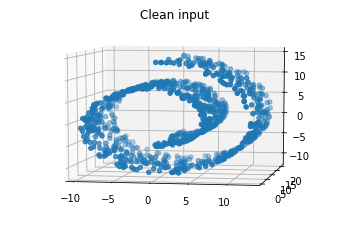

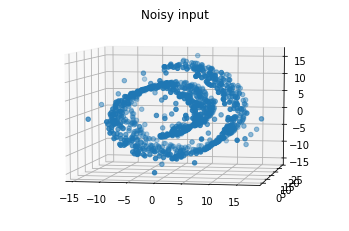

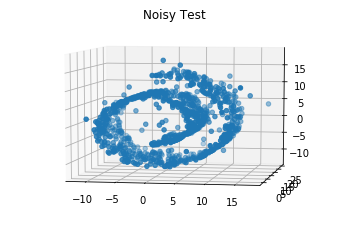

In [8]:
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
import random

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(5)

class autoencoder_denoising(nn.Module):
    def __init__(self):
        super(autoencoder_denoising, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(3, 5), nn.Tanh(), 
            nn.Linear(5, 10), nn.Tanh(), 
            nn.Linear(10, 5), nn.Tanh(), 
            nn.Linear(5, 3), nn.Tanh())
        self.decoder = nn.Sequential(
            nn.Linear(3, 5), nn.Tanh(),
            nn.Linear(5, 10), nn.Tanh(), 
            nn.Linear(10, 5), nn.Tanh(), 
            nn.Linear(5, 3))

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# clean data
n_sample = 1000
X_clean, _ = datasets.make_swiss_roll(n_sample)
# noise data
X_noise = X_clean.copy()
random_index = random.sample(range(1, n_sample), 100)
X_noise[random_index, :] += (10*np.random.random([100, 3])-5)

X_test = X_clean.copy()
random_index = random.sample(range(1, n_sample), 100)
X_test[random_index, :] += (10*np.random.random([100, 3])-5)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X_clean[:,0], X_clean[:, 1], X_clean[:, 2])
ax.view_init(7, -80)
ax.set_title("Clean input")
plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X_noise[:,0], X_noise[:, 1], X_noise[:, 2])
ax.view_init(7, -80)
ax.set_title("Noisy input")
plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X_test[:,0], X_test[:, 1], X_test[:, 2])
ax.view_init(7, -80)
ax.set_title("Noisy Test")
plt.show()

0 84.14535522460938
1000 48.99413299560547
2000 37.00216293334961
3000 27.984933853149414
4000 12.445638656616211
5000 8.319875717163086
6000 6.278280258178711
7000 4.279991149902344
8000 2.6440956592559814
9000 1.5786021947860718
Training finished


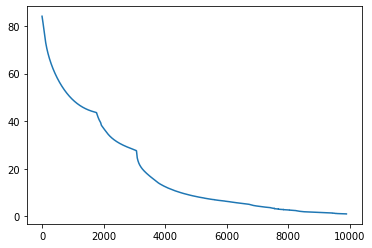

In [9]:
# definition
inputs_clean = Variable(torch.Tensor(X_clean).float())
inputs_noise = Variable(torch.Tensor(X_noise).float())
inputs_test  = Variable(torch.Tensor(X_test).float())

model = autoencoder_denoising()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), 
                             lr=0.001)

# training
loss_tracker = []
converged = False
epoch = 0
while not converged:
    # ===================forward=====================
    outputs = model(inputs_noise)
    loss = criterion(outputs, inputs_clean)
    # ===================backward====================
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_tracker.append(loss.item())
    if epoch%1000 == 0:
        print(epoch, loss.item())
    if loss_tracker[epoch] < 1:
        converged = True
    epoch += 1

print('Training finished')

plt.plot(loss_tracker)
plt.show()

In [12]:
# test
model.eval()
outputs = model(inputs_test)
X_pred = outputs.data.numpy()

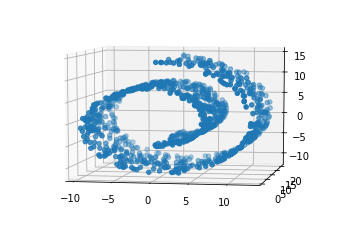

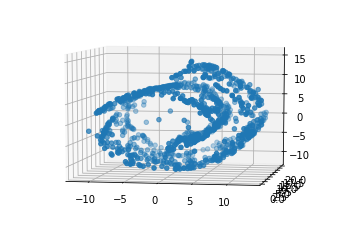

In [13]:
# visualization of the 3D manifold
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_clean[:,0], X_clean[:,1], X_clean[:,2])
ax.view_init(7, -80)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pred[:,0], X_pred[:,1], X_pred[:,2])
ax.view_init(7, -80)
plt.show()

### Variational Autoencoder

Neural Networks:

- approximation of some functions we want to model
- data structure that holds information
    - imagine to train a NN from one_hotted vectors to images
    - adding more parameters in the network, it can memorize different images
    - the network learn the mapping from a latent vector (space) to our desired output (this is a pure decoder).

#### From a Lego point of view

We would like to build a generative model, not just a fuzzy data structure that can 'memorize' images.
How to generate? So far, we don't know how to create latent vectors other than encoding them from images.


(1000, 16000)
2093.004522404789


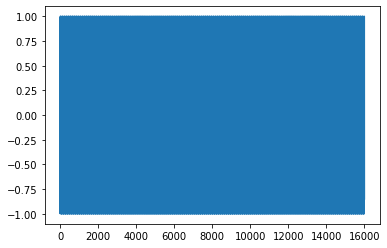

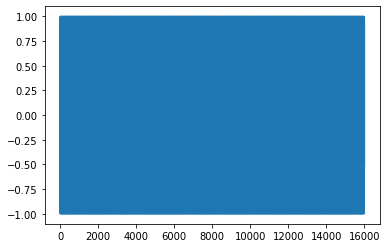

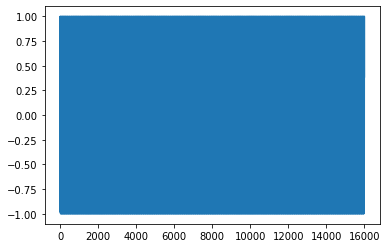

In [31]:
from scipy import signal as sg

# generate the dataset
n_sec = 1
Fs = 16000
time = np.arange(0, n_sec, 1/Fs)
gen_sine = lambda A, f : A*np.sin(2*np.pi*f*time)
gen_square  = lambda A, f : sg.square(2*np.pi*f*time)
gen_sawtooth  = lambda A, f : sg.sawtooth(2*np.pi*f*time)
functions = [gen_sine, gen_square, gen_sawtooth]

n_samples = 1000
random_amplitude = np.ones(n_samples)
note_to_freq = lambda n : 440*2**(n/12)
random_frequencies = note_to_freq(np.random.randint(-21,27,n_samples))
random_function  = np.random.randint(0,len(functions),n_samples)

dataset = np.zeros([n_samples, Fs])
for i in range(n_sample):
    dataset[i, :] = functions[random_function[i]](1, random_frequencies[i])

print(dataset.shape)

plt.plot(dataset[777, :])
plt.show()
plt.plot(dataset[12, :])
plt.show()
plt.plot(dataset[55, :])
plt.show()

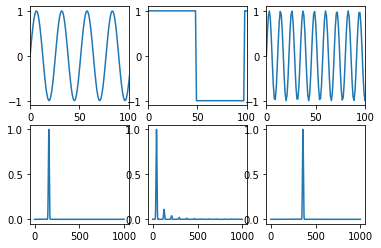

In [93]:
nfft = 4096
def stft(x):
    f, t, X = sg.stft(x, Fs, nperseg=512, nfft=nfft)
    return X

normalize = lambda x : x/np.max(np.abs(x))
mag_stft_template = lambda x : normalize(np.sum((np.abs(stft(x)))**2, axis=1))

dataset_fft = np.zeros([n_samples, 1000])
for i in range(n_samples):
    dataset_fft[i, :] = mag_stft_template(dataset[i, :])[:1000]
    
n_example = 3
fig, axarr = plt.subplots(2, n_example)
for i in range(n_example):
    axarr[0, i].plot(dataset[i*100, :])
    axarr[0, i].set_xlim([0, 100])
    axarr[1, i].plot(dataset_fft[i*100, :])
plt.show()

In [111]:
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as utils

import random

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(5)

class autoencoder(nn.Module):
    def __init__(self, input_size):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 200), nn.ReLU(True), 
            nn.Linear(200, 50), nn.ReLU(True), 
            nn.Linear(50, 20), nn.ReLU(True), 
            nn.Linear(20, 10), nn.ReLU(True))
        self.decoder = nn.Sequential(
            nn.Linear(10, 20), nn.ReLU(True),
            nn.Linear(20, 50), nn.ReLU(True), 
            nn.Linear(50, 200), nn.ReLU(True), 
            nn.Linear(200, input_size), nn.Sigmoid())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# data
torch_dataset = Variable(torch.Tensor(dataset_fft).float())
data_loader = utils.DataLoader(torch_dataset, batch_size=1000) # create your dataloader

d_dim = dataset_fft.shape[-1]
model = autoencoder(d_dim)
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
data_fit_criterion = nn.BCELoss()
# training
loss_tracker = []
converged = False
epoch = 0
while not converged:
    loss_item = 0
    for i, inputs in enumerate(data_loader):
        # ===================forward=====================
        outputs = model(inputs)
        loss = data_fit_criterion(outputs, inputs) \
                + torch.functional.F.l1_loss(outputs, torch.zeros_like(outputs))
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        loss_item += loss.item() 
        
    if (epoch+1) % 100 == 0:
        print ("Epoch[{}/{}], Reconst Loss: {:.4f}" 
                .format(epoch+1, 1000, loss_item))
        
    loss_tracker.append(loss_item)
    if loss_tracker[-2] < loss_item:
        converged = True
    epoch += 1

print('done.')
plt.plot(loss_tracker)
plt.show()

Epoch[100/1000], Reconst Loss: 0.0778
Epoch[200/1000], Reconst Loss: 0.0770
Epoch[300/1000], Reconst Loss: 0.0764
Epoch[400/1000], Reconst Loss: 0.0731
Epoch[500/1000], Reconst Loss: 0.0675
Epoch[600/1000], Reconst Loss: 0.0630
Epoch[700/1000], Reconst Loss: 0.0606
Epoch[800/1000], Reconst Loss: 0.0589
Epoch[900/1000], Reconst Loss: 0.0576
Epoch[1000/1000], Reconst Loss: 0.0563
Epoch[1100/1000], Reconst Loss: 0.0550
Epoch[1200/1000], Reconst Loss: 0.0537
Epoch[1300/1000], Reconst Loss: 0.0523
Epoch[1400/1000], Reconst Loss: 0.0510
Epoch[1500/1000], Reconst Loss: 0.0495
Epoch[1600/1000], Reconst Loss: 0.0487
Epoch[1700/1000], Reconst Loss: 0.0478
Epoch[1800/1000], Reconst Loss: 0.0468
Epoch[1900/1000], Reconst Loss: 0.0436
Epoch[2000/1000], Reconst Loss: 0.0419
Epoch[2100/1000], Reconst Loss: 0.0414
Epoch[2200/1000], Reconst Loss: 0.0412
Epoch[2300/1000], Reconst Loss: 0.0409
Epoch[2400/1000], Reconst Loss: 0.0403
Epoch[2500/1000], Reconst Loss: 0.0400
Epoch[2600/1000], Reconst Loss: 0.

KeyboardInterrupt: 

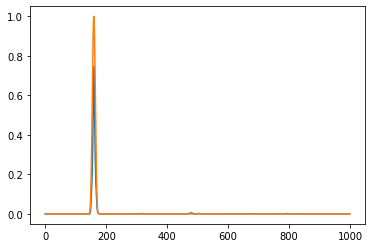

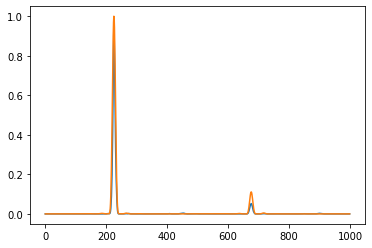

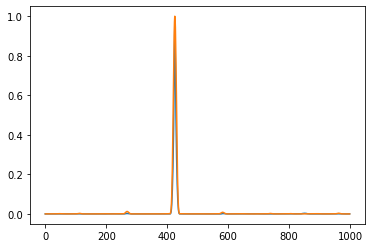

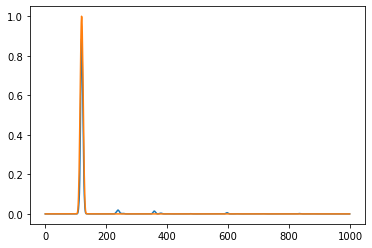

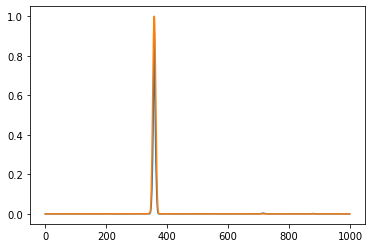

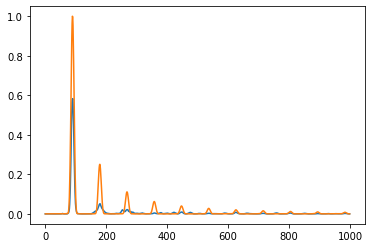

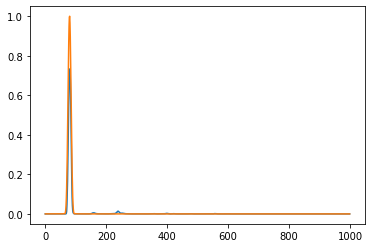

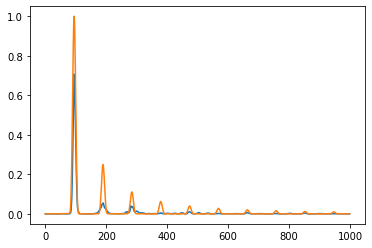

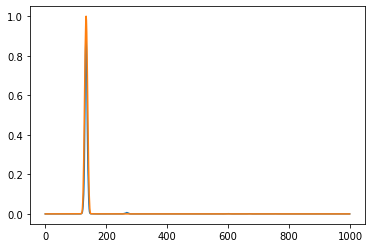

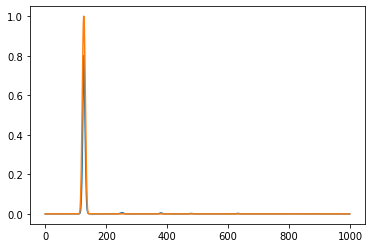

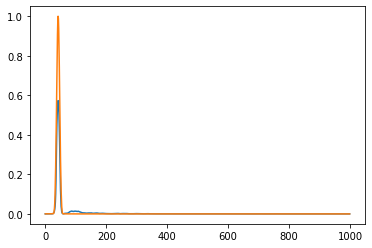

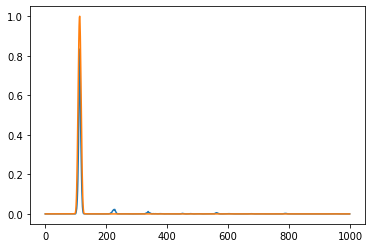

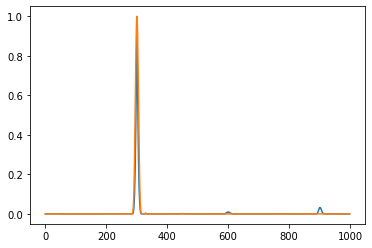

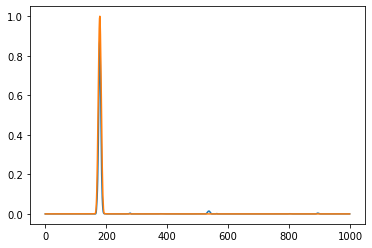

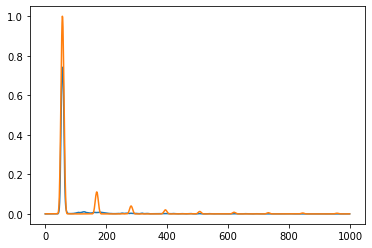

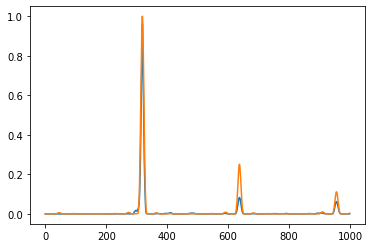

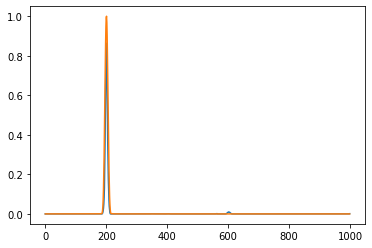

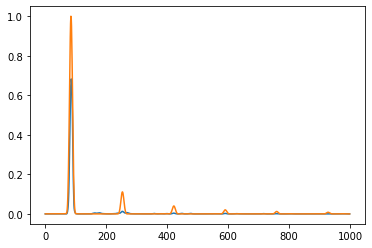

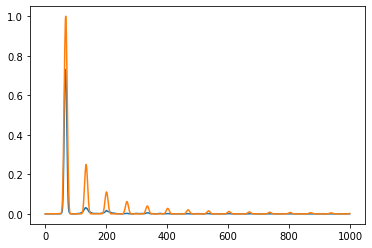

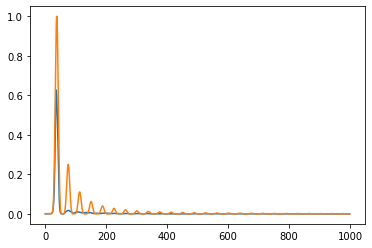

In [112]:
for i in range(20):
    plt.plot(outputs[i, :].data.numpy())
    plt.plot(inputs[i, :].data.numpy())
    plt.show()

In [114]:
import torch
import torch.nn as nn
import torch.utils.data as utils

class VAE(nn.Module):
    def __init__(self, input_size, h_dim=400, z_dim=3):
        super(VAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 200), nn.ReLU(True), 
            nn.Linear(200, 50), nn.ReLU(True), 
            nn.Linear(50, 20), nn.ReLU(True), 
            nn.Linear(20, 10), nn.ReLU(True))
        self.decoder = nn.Sequential(
            nn.Linear(10, 20), nn.ReLU(True),
            nn.Linear(20, 50), nn.ReLU(True), 
            nn.Linear(50, 200), nn.ReLU(True), 
            nn.Linear(200, input_size), nn.Sigmoid())
        self.fc_mu = nn.Linear(10, 10)
        self.fc_sg = nn.Linear(10, 10)
        
    def encode(self, x):
        h = self.encoder(x)
        return self.fc_mu(h), self.fc_sg(h)
    
    def reparameterize(self, mu, log_var):
        std = torch.exp(log_var/2)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        return self.decoder(z)
    
    def forward(self, x):
        mu, log_var = self.encode(x)
        z = self.reparameterize(mu, log_var)
        x_reconst = self.decode(z)
        return x_reconst, mu, log_var

d_dim = dataset.shape[-1]
learning_rate = 1e-3

# data
torch_dataset = Variable(torch.Tensor(dataset_fft).float())
data_loader = utils.DataLoader(torch_dataset, batch_size=200) # create your dataloader

d_dim = dataset_fft.shape[-1]
model = VAE(d_dim)
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
data_fit_criterion = nn.BCELoss()

# training
loss_tracker = []
converged = False
epoch = 0
while not converged:
    for i, inputs in enumerate(data_loader):
        # ===================forward=====================
        outputs, mu, log_var = model(inputs)
        # Compute reconstruction loss and kl divergence
        # For KL divergence, see Appendix B in VAE paper or http://yunjey47.tistory.com/43
        reconst_loss = data_fit_criterion(outputs, inputs)
        kl_div = - 0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
        # ===================backward====================
        loss = reconst_loss + kl_div
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 10 == 0:
            print ("Epoch[{}/{}], Step [{}/{}], Reconst Loss: {:.4f}, KL Div: {:.4f}" 
                    .format(epoch+1, 1000, i+1, len(data_loader), reconst_loss.item(), kl_div.item()))

            plt.plot(outputs.data.numpy()[0, :])
            plt.show()
    if reconst_loss.item() < 0.03:
        converged = True
    epoch += 1
        
print('done.')

KeyboardInterrupt: 

In [ ]:
outputs, mu, log_var = model(inputs)
pred = outputs.data.numpy()

plt.plot(pred[10, :])
plt.plot(dataset[10, :])
plt.show()